In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import glob
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

dataset = pd.read_csv(r'C:\Users\suayp\Desktop\kullanilacak_veri\Project_Data.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values



In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  17    1    2    3    1    1   19]
 [   1   21    0    0    0    0   13]
 [   1    1   26    0    2    0   14]
 [   1    1    0   32    0    1    9]
 [   3    0    0    0   42    0   20]
 [   1    0    1    0    1    1   79]
 [  17   16   14    4   12   67 1793]]


In [8]:
dataset.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [9]:
from sklearn import tree

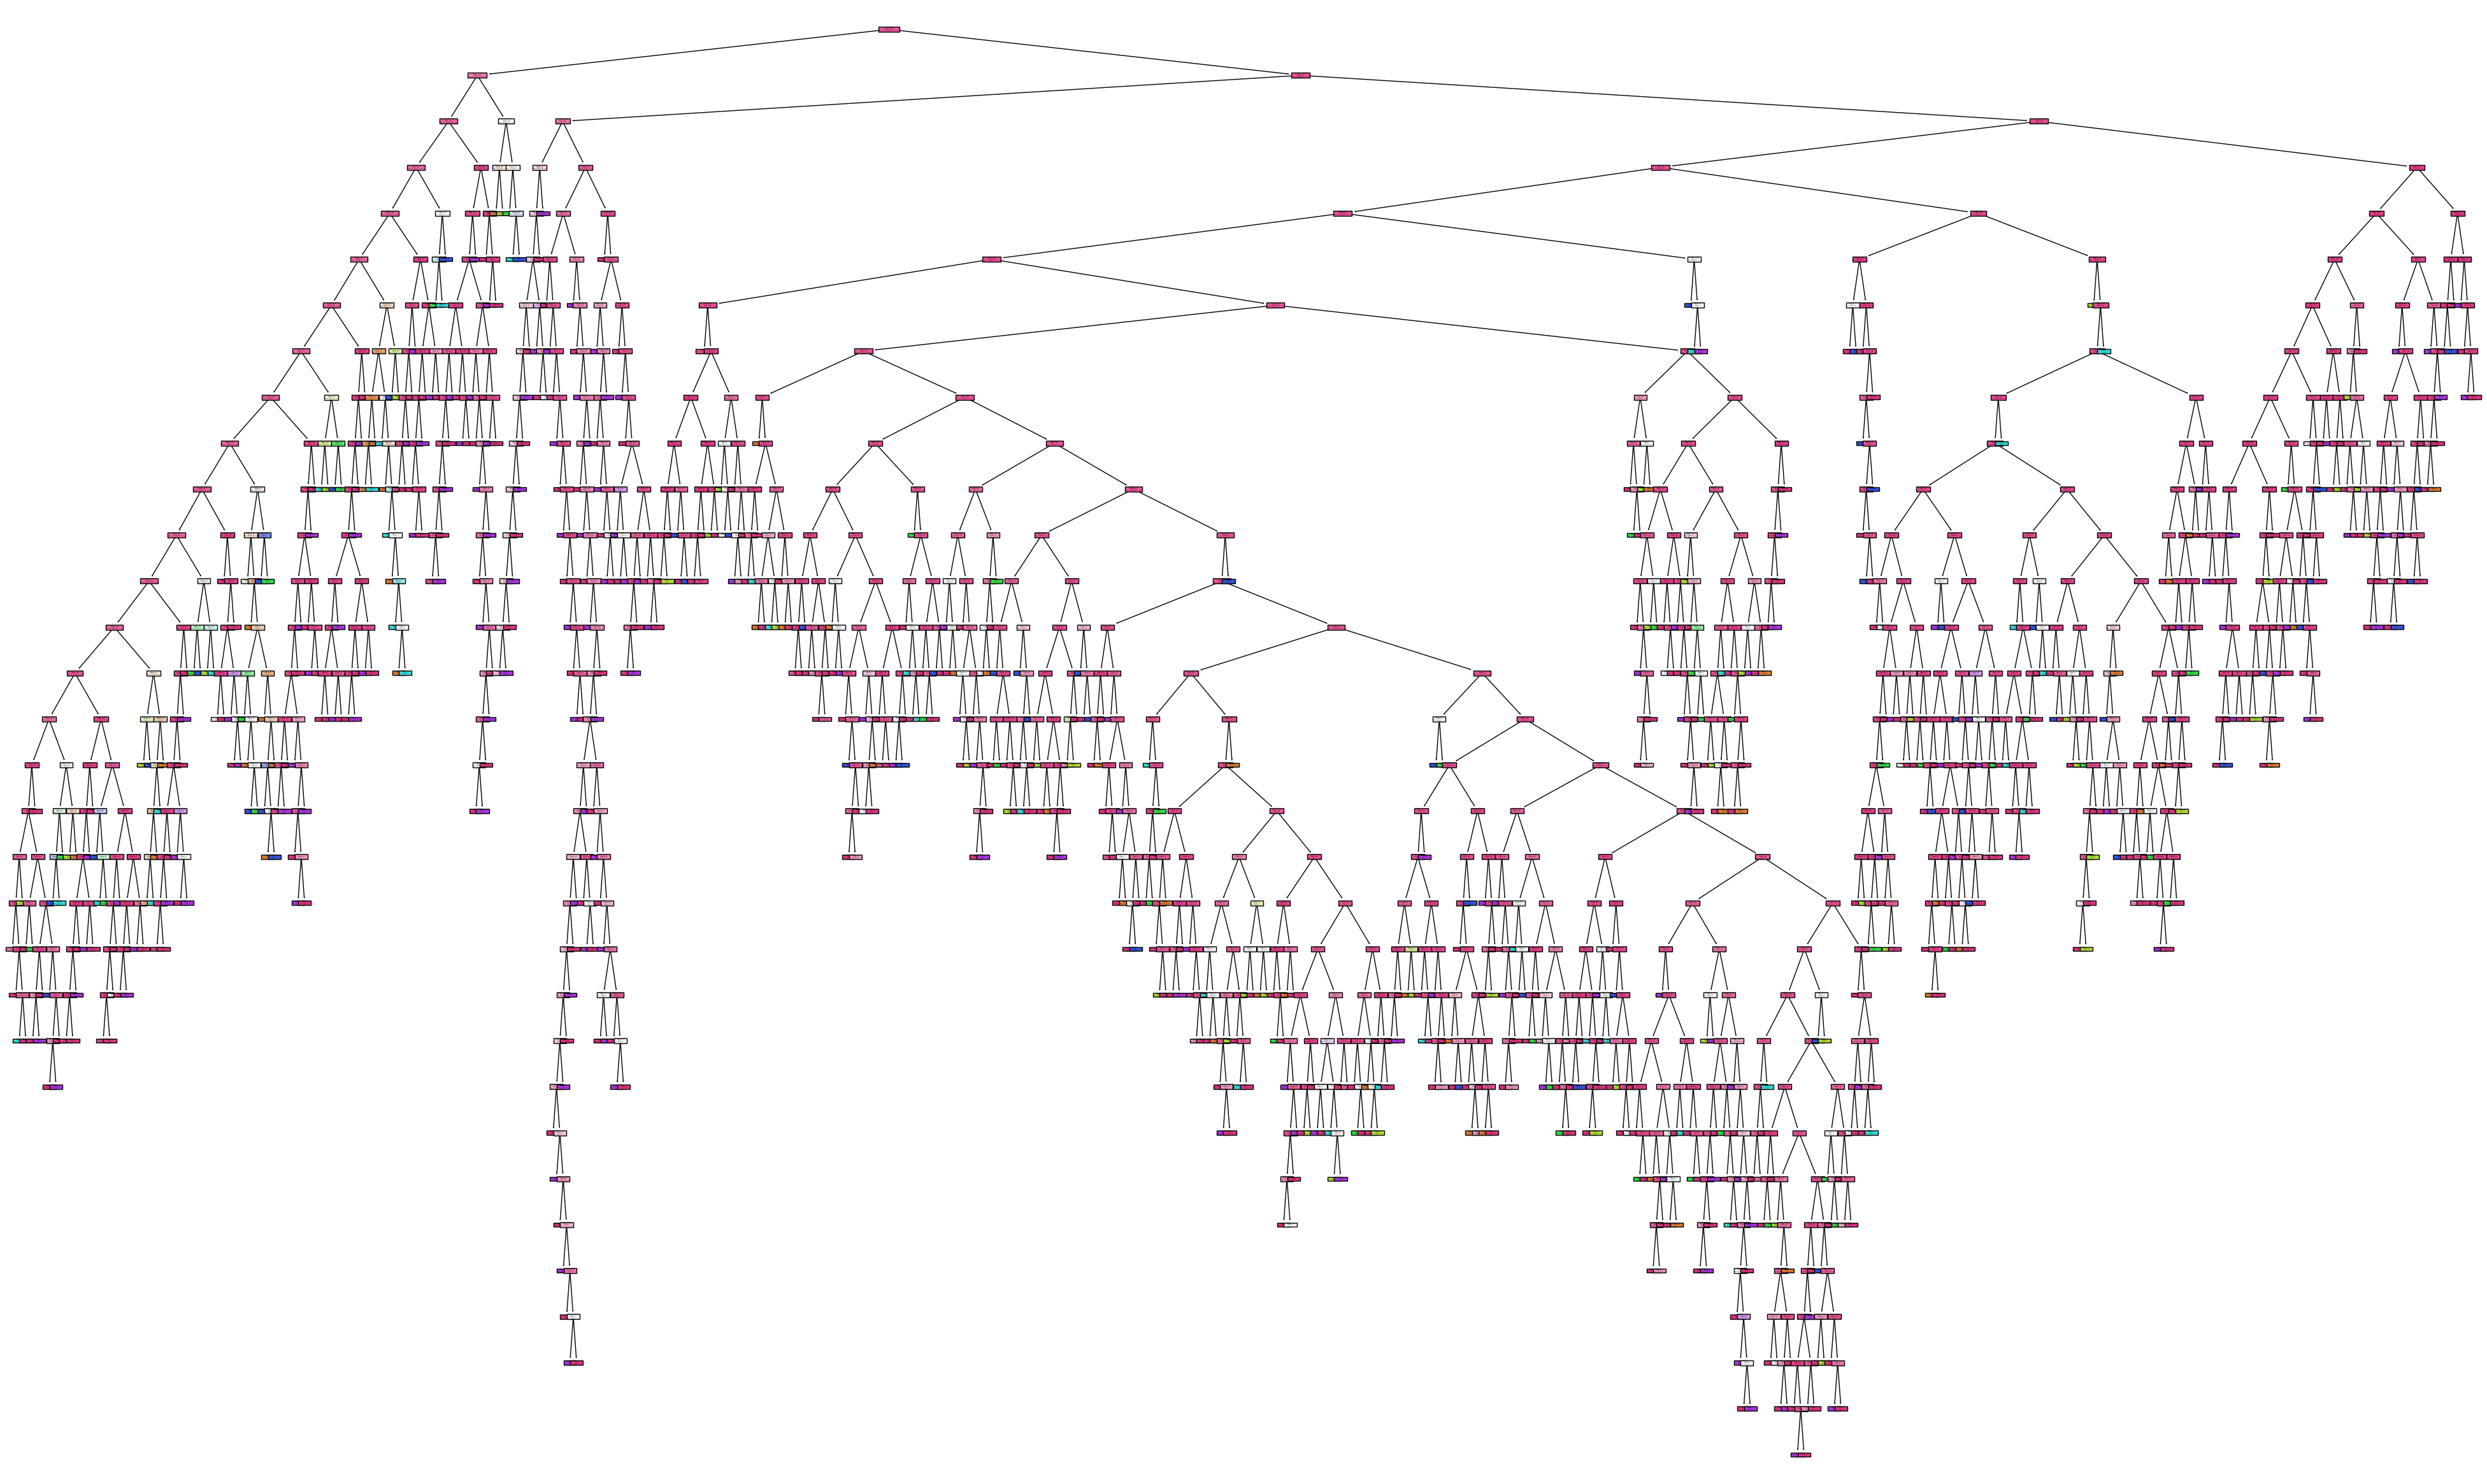

In [10]:
fn = ['BALANCE', 'PAYMENTS']
cn = classifier.classes_.astype(str).tolist()  
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(50, 30))
tree.plot_tree(classifier, feature_names=fn, class_names=cn, filled=True)
fig.savefig('2609dt.png')

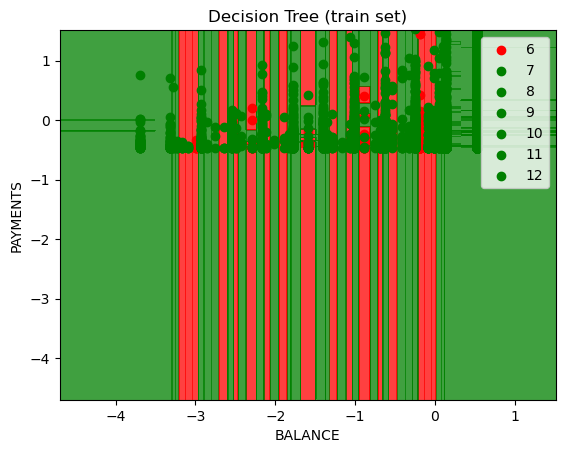

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree (train set)')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend()
plt.show()


In [12]:
path = r'C:\Users\suayp\Desktop\kullanilacak_veri'  # Klasör yolu
filenames = glob.glob(path + r"\*.csv")  # Tüm CSV dosyalarının listesi

credit = pd.DataFrame()  # Burada credit adında boş bir DataFrame oluşturduk.

for f in filenames:
    df = pd.read_csv(f)
    credit = credit.append(df, ignore_index=True, sort=True)


In [13]:
credit.head(10)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0    40.900749           0.818182      0.000000                0.000000   
1  3202.467416           0.909091   6442.945483                0.250000   
2  2495.148862           1.000000      0.000000                0.000000   
3  1666.670542           0.636364    205.788017                0.083333   
4   817.714335           1.000000      0.000000                0.000000   
5  1809.828751           1.000000      0.000000                0.000000   
6   627.260806           1.000000      0.000000                0.000000   
7  1823.652743           1.000000      0.000000                0.000000   
8  1014.926473           1.000000      0.000000                0.000000   
9   152.225975           0.545455      0.000000                0.000000   

   CASH_ADVANCE_TRX  CREDIT_LIMIT CUST_ID  INSTALLMENTS_PURCHASES  \
0                 0        1000.0  C10001                   95.40   
1                 4        7000.0  C10002                    0.00   
2                 0        7500.0  C10003                    0.00   
3                 1        7500.0  C10004                    0.00   
4                 0        1200.0  C10005                    0.00   
5                 0        1800.0  C10006                 1333.28   
6                 0       13500.0  C10007                  688.38   
7                 0        2300.0  C10008                  436.20   
8                 0        7000.0  C10009                  200.00   
9                 0       11000.0  C10010                    0.00   

   MINIMUM_PAYMENTS  ONEOFF_PURCHASES  ONEOFF_PURCHASES_FREQUENCY  \
0        139.509787              0.00                    0.000000   
1       1072.340217              0.00                    0.000000   
2        627.284787            773.17                    1.000000   
3          0.000000           1499.00                    0.083333   
4        244.791237             16.00                    0.083333   
5       2407.246035              0.00                    0.000000   
6        198.065894           6402.63                    1.000000   
7        532.033990              0.00                    0.000000   
8        311.963409            661.49                    0.083333   
9        100.302262           1281.60                    0.166667   

      PAYMENTS  PRC_FULL_PAYMENT  PURCHASES  PURCHASES_FREQUENCY  \
0   201.802084          0.000000      95.40             0.166667   
1  4103.032597          0.222222       0.00             0.000000   
2   622.066742          0.000000     773.17             1.000000   
3     0.000000          0.000000    1499.00             0.083333   
4   678.334763          0.000000      16.00             0.083333   
5  1400.057770          0.000000    1333.28             0.666667   
6  6354.314328          1.000000    7091.01             1.000000   
7   679.065082          0.000000     436.20             1.000000   
8   688.278568          0.000000     861.49             0.333333   
9  1164.770591          0.000000    1281.60             0.166667   

   PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  TENURE  
0                          0.083333              2      12  
1                          0.000000              0      12  
2                          0.000000             12      12  
3                          0.000000              1      12  
4                          0.000000              1      12  
5                          0.583333              8      12  
6                          1.000000             64      12  
7                          1.000000             12      12  
8                          0.250000              5      12  
9                          0.000000              3      12

In [14]:
credit.tail(3)

BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
8947   23.398673           0.833333      0.000000                0.000000   
8948   13.457564           0.833333     36.558778                0.166667   
8949  372.708075           0.666667    127.040008                0.333333   

      CASH_ADVANCE_TRX  CREDIT_LIMIT CUST_ID  INSTALLMENTS_PURCHASES  \
8947                 0        1000.0  C19188                   144.4   
8948                 2         500.0  C19189                     0.0   
8949                 2        1200.0  C19190                     0.0   

      MINIMUM_PAYMENTS  ONEOFF_PURCHASES  ONEOFF_PURCHASES_FREQUENCY  \
8947         82.418369              0.00                    0.000000   
8948         55.755628              0.00                    0.000000   
8949         88.288956           1093.25                    0.666667   

       PAYMENTS  PRC_FULL_PAYMENT  PURCHASES  PURCHASES_FREQUENCY  \
8947  81.270775              0.25     144.40             0.833333   
8948  52.549959              0.25       0.00             0.000000   
8949  63.165404              0.00    1093.25             0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  TENURE  
8947                          0.666667              5       6  
8948                          0.000000              0       6  
8949                          0.000000             23       6

In [15]:
credit['PURCHASES_INSTALLMENTS_FREQUENCY'].unique()

array([0.083333, 0.      , 0.583333, 1.      , 0.25    , 0.916667,
       0.75    , 0.5     , 0.333333, 0.666667, 0.416667, 0.166667,
       0.833333, 0.4     , 0.181818, 0.818182, 0.272727, 0.375   ,
       0.125   , 0.636364, 0.545455, 0.909091, 0.888889, 0.2     ,
       0.8     , 0.1     , 0.142857, 0.857143, 0.444444, 0.454545,
       0.111111, 0.6     , 0.555556, 0.777778, 0.3     , 0.9     ,
       0.363636, 0.714286, 0.875   , 0.222222, 0.285714, 0.7     ,
       0.727273, 0.571429, 0.090909, 0.428571, 0.625   ])

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   CASH_ADVANCE                      8950 non-null   float64
 3   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 4   CASH_ADVANCE_TRX                  8950 non-null   int64  
 5   CREDIT_LIMIT                      8950 non-null   float64
 6   CUST_ID                           8950 non-null   object 
 7   INSTALLMENTS_PURCHASES            8950 non-null   float64
 8   MINIMUM_PAYMENTS                  8950 non-null   float64
 9   ONEOFF_PURCHASES                  8950 non-null   float64
 10  ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 11  PAYMENTS                          8950 non-null   float64
 12  PRC_FU

In [17]:
data = pd.read_csv(r'C:\Users\suayp\Desktop\kullanilacak_veri\Project_Data.csv')

In [18]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [19]:
import pandas as pd

dataset = pd.read_csv(r'C:\Users\suayp\Desktop\kullanilacak_veri\Project_Data.csv')
X = dataset.iloc[:, 3:]
print(X.head())


   PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0      95.40              0.00                    95.4      0.000000   
1       0.00              0.00                     0.0   6442.945483   
2     773.17            773.17                     0.0      0.000000   
3    1499.00           1499.00                     0.0    205.788017   
4      16.00             16.00                     0.0      0.000000   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.166667                    0.000000   
1             0.000000                    0.000000   
2             1.000000                    1.000000   
3             0.083333                    0.083333   
4             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                0.000000                 0   
1                          0.000000                0.250000                 4   

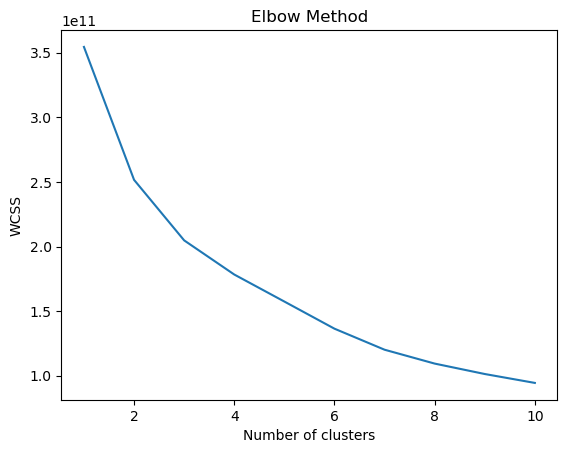

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [22]:
y_kmeans

array([1, 3, 3, ..., 1, 1, 1])

In [23]:
X[y_kmeans == 0].head()

PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
19      398.64               0.0                  398.64      0.000000   
20      176.68               0.0                  176.68      0.000000   
34      547.28               0.0                  547.28      0.000000   
150    4059.93               0.0                 4059.93    555.469352   
387       0.00               0.0                    0.00   4909.937494   

     PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
19              1.000000                         0.0   
20              0.666667                         0.0   
34              1.000000                         0.0   
150             0.583333                         0.0   
387             0.000000                         0.0   

     PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
19                           1.000000                0.000000   
20                           0.666667                0.000000   
34                           1.000000                0.000000   
150                          0.500000                0.166667   
387                          0.000000                0.250000   

     CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
19                  0             12        4000.0  1053.980464   
20                  0              8        2000.0   223.068600   
34                  0             14       11000.0  8735.607835   
150                 7             14        7000.0  3685.610620   
387                 4              0        9000.0   677.144841   

     MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
19        12465.54938               0.0      12  
20        13557.29726               0.0      12  
34        17862.55831               0.0      12  
150       12854.93970               0.0      12  
387       27631.45072               0.0      12

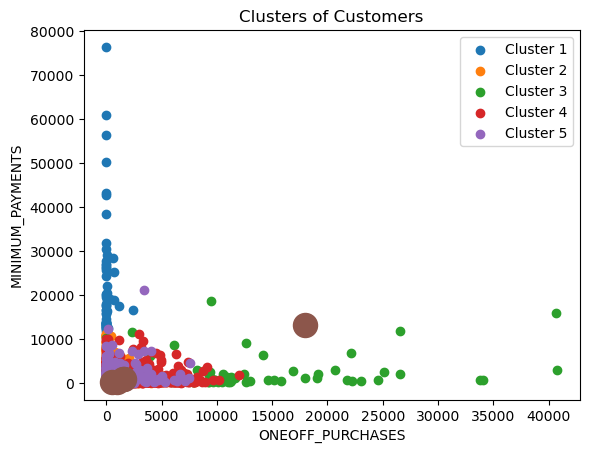

In [24]:
X_df = pd.DataFrame(X, columns=['ONEOFF_PURCHASES', 'MINIMUM_PAYMENTS'])
plt.scatter(X[y_kmeans == 0]['ONEOFF_PURCHASES'], X[y_kmeans == 0]['MINIMUM_PAYMENTS'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['ONEOFF_PURCHASES'], X[y_kmeans == 1]['MINIMUM_PAYMENTS'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['ONEOFF_PURCHASES'], X[y_kmeans == 2]['MINIMUM_PAYMENTS'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['ONEOFF_PURCHASES'], X[y_kmeans == 3]['MINIMUM_PAYMENTS'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['ONEOFF_PURCHASES'], X[y_kmeans == 4]['MINIMUM_PAYMENTS'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300)
plt.title('Clusters of Customers')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.show()

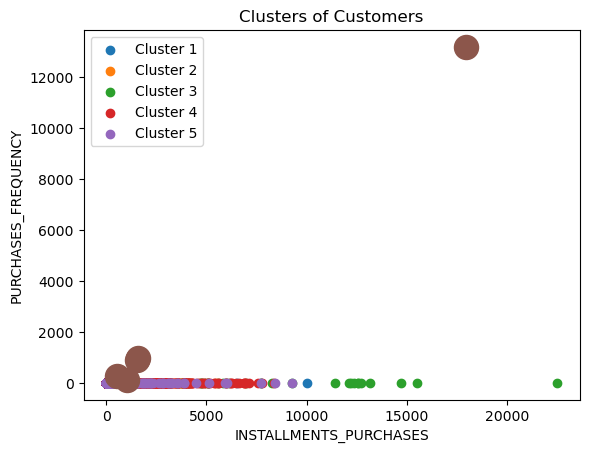

In [25]:
plt.scatter(X[y_kmeans == 0]['INSTALLMENTS_PURCHASES'], X[y_kmeans == 0]['PURCHASES_FREQUENCY'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['INSTALLMENTS_PURCHASES'], X[y_kmeans == 1]['PURCHASES_FREQUENCY'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['INSTALLMENTS_PURCHASES'], X[y_kmeans == 2]['PURCHASES_FREQUENCY'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['INSTALLMENTS_PURCHASES'], X[y_kmeans == 3]['PURCHASES_FREQUENCY'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['INSTALLMENTS_PURCHASES'], X[y_kmeans == 4]['PURCHASES_FREQUENCY'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300)
plt.title('Clusters of Customers')
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
plt.show()

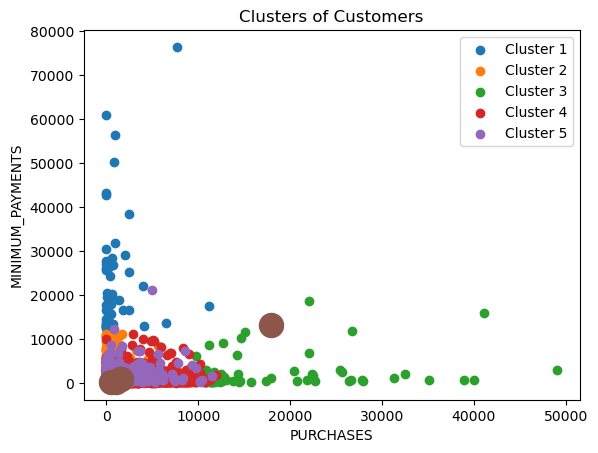

In [26]:
plt.scatter(X[y_kmeans == 0]['PURCHASES'], X[y_kmeans == 0]['MINIMUM_PAYMENTS'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['PURCHASES'], X[y_kmeans == 1]['MINIMUM_PAYMENTS'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['PURCHASES'], X[y_kmeans == 2]['MINIMUM_PAYMENTS'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['PURCHASES'], X[y_kmeans == 3]['MINIMUM_PAYMENTS'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['PURCHASES'], X[y_kmeans == 4]['MINIMUM_PAYMENTS'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300)
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.show()

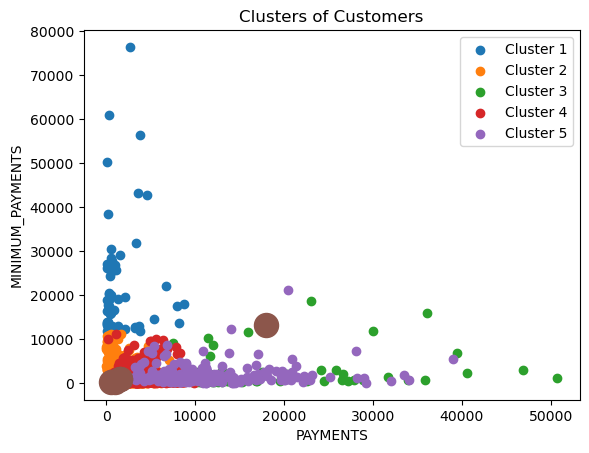

In [27]:
plt.scatter(X[y_kmeans == 0]['PAYMENTS'], X[y_kmeans == 0]['MINIMUM_PAYMENTS'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['PAYMENTS'], X[y_kmeans == 1]['MINIMUM_PAYMENTS'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['PAYMENTS'], X[y_kmeans == 2]['MINIMUM_PAYMENTS'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['PAYMENTS'], X[y_kmeans == 3]['MINIMUM_PAYMENTS'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['PAYMENTS'], X[y_kmeans == 4]['MINIMUM_PAYMENTS'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300)
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.show()

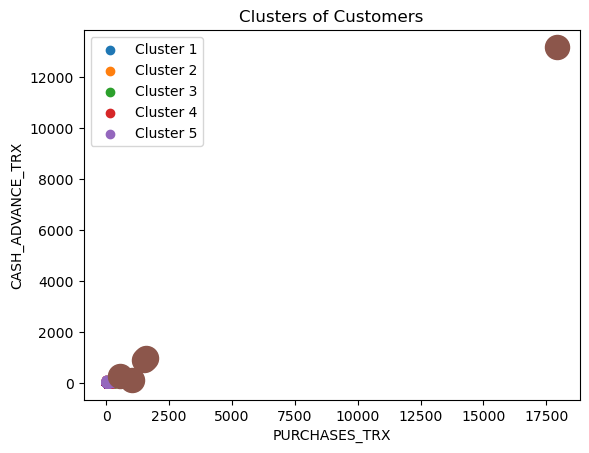

In [28]:
plt.scatter(X[y_kmeans == 0]['PURCHASES_TRX'], X[y_kmeans == 0]['CASH_ADVANCE_TRX'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['PURCHASES_TRX'], X[y_kmeans == 1]['CASH_ADVANCE_TRX'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['PURCHASES_TRX'], X[y_kmeans == 2]['CASH_ADVANCE_TRX'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['PURCHASES_TRX'], X[y_kmeans == 3]['CASH_ADVANCE_TRX'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['PURCHASES_TRX'], X[y_kmeans == 4]['CASH_ADVANCE_TRX'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300)
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES_TRX')
plt.ylabel('CASH_ADVANCE_TRX')
plt.legend()
plt.show()

In [29]:
dataset = pd.read_csv(r'C:\Users\suayp\Desktop\kullanilacak_veri\Project_Data.csv')
dataset.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [30]:
dataset.shape

(8950, 18)

In [31]:
X = dataset.drop(['BALANCE'], axis = True)
y = dataset['BALANCE']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7160, 17), (1790, 17), (7160,), (1790,))

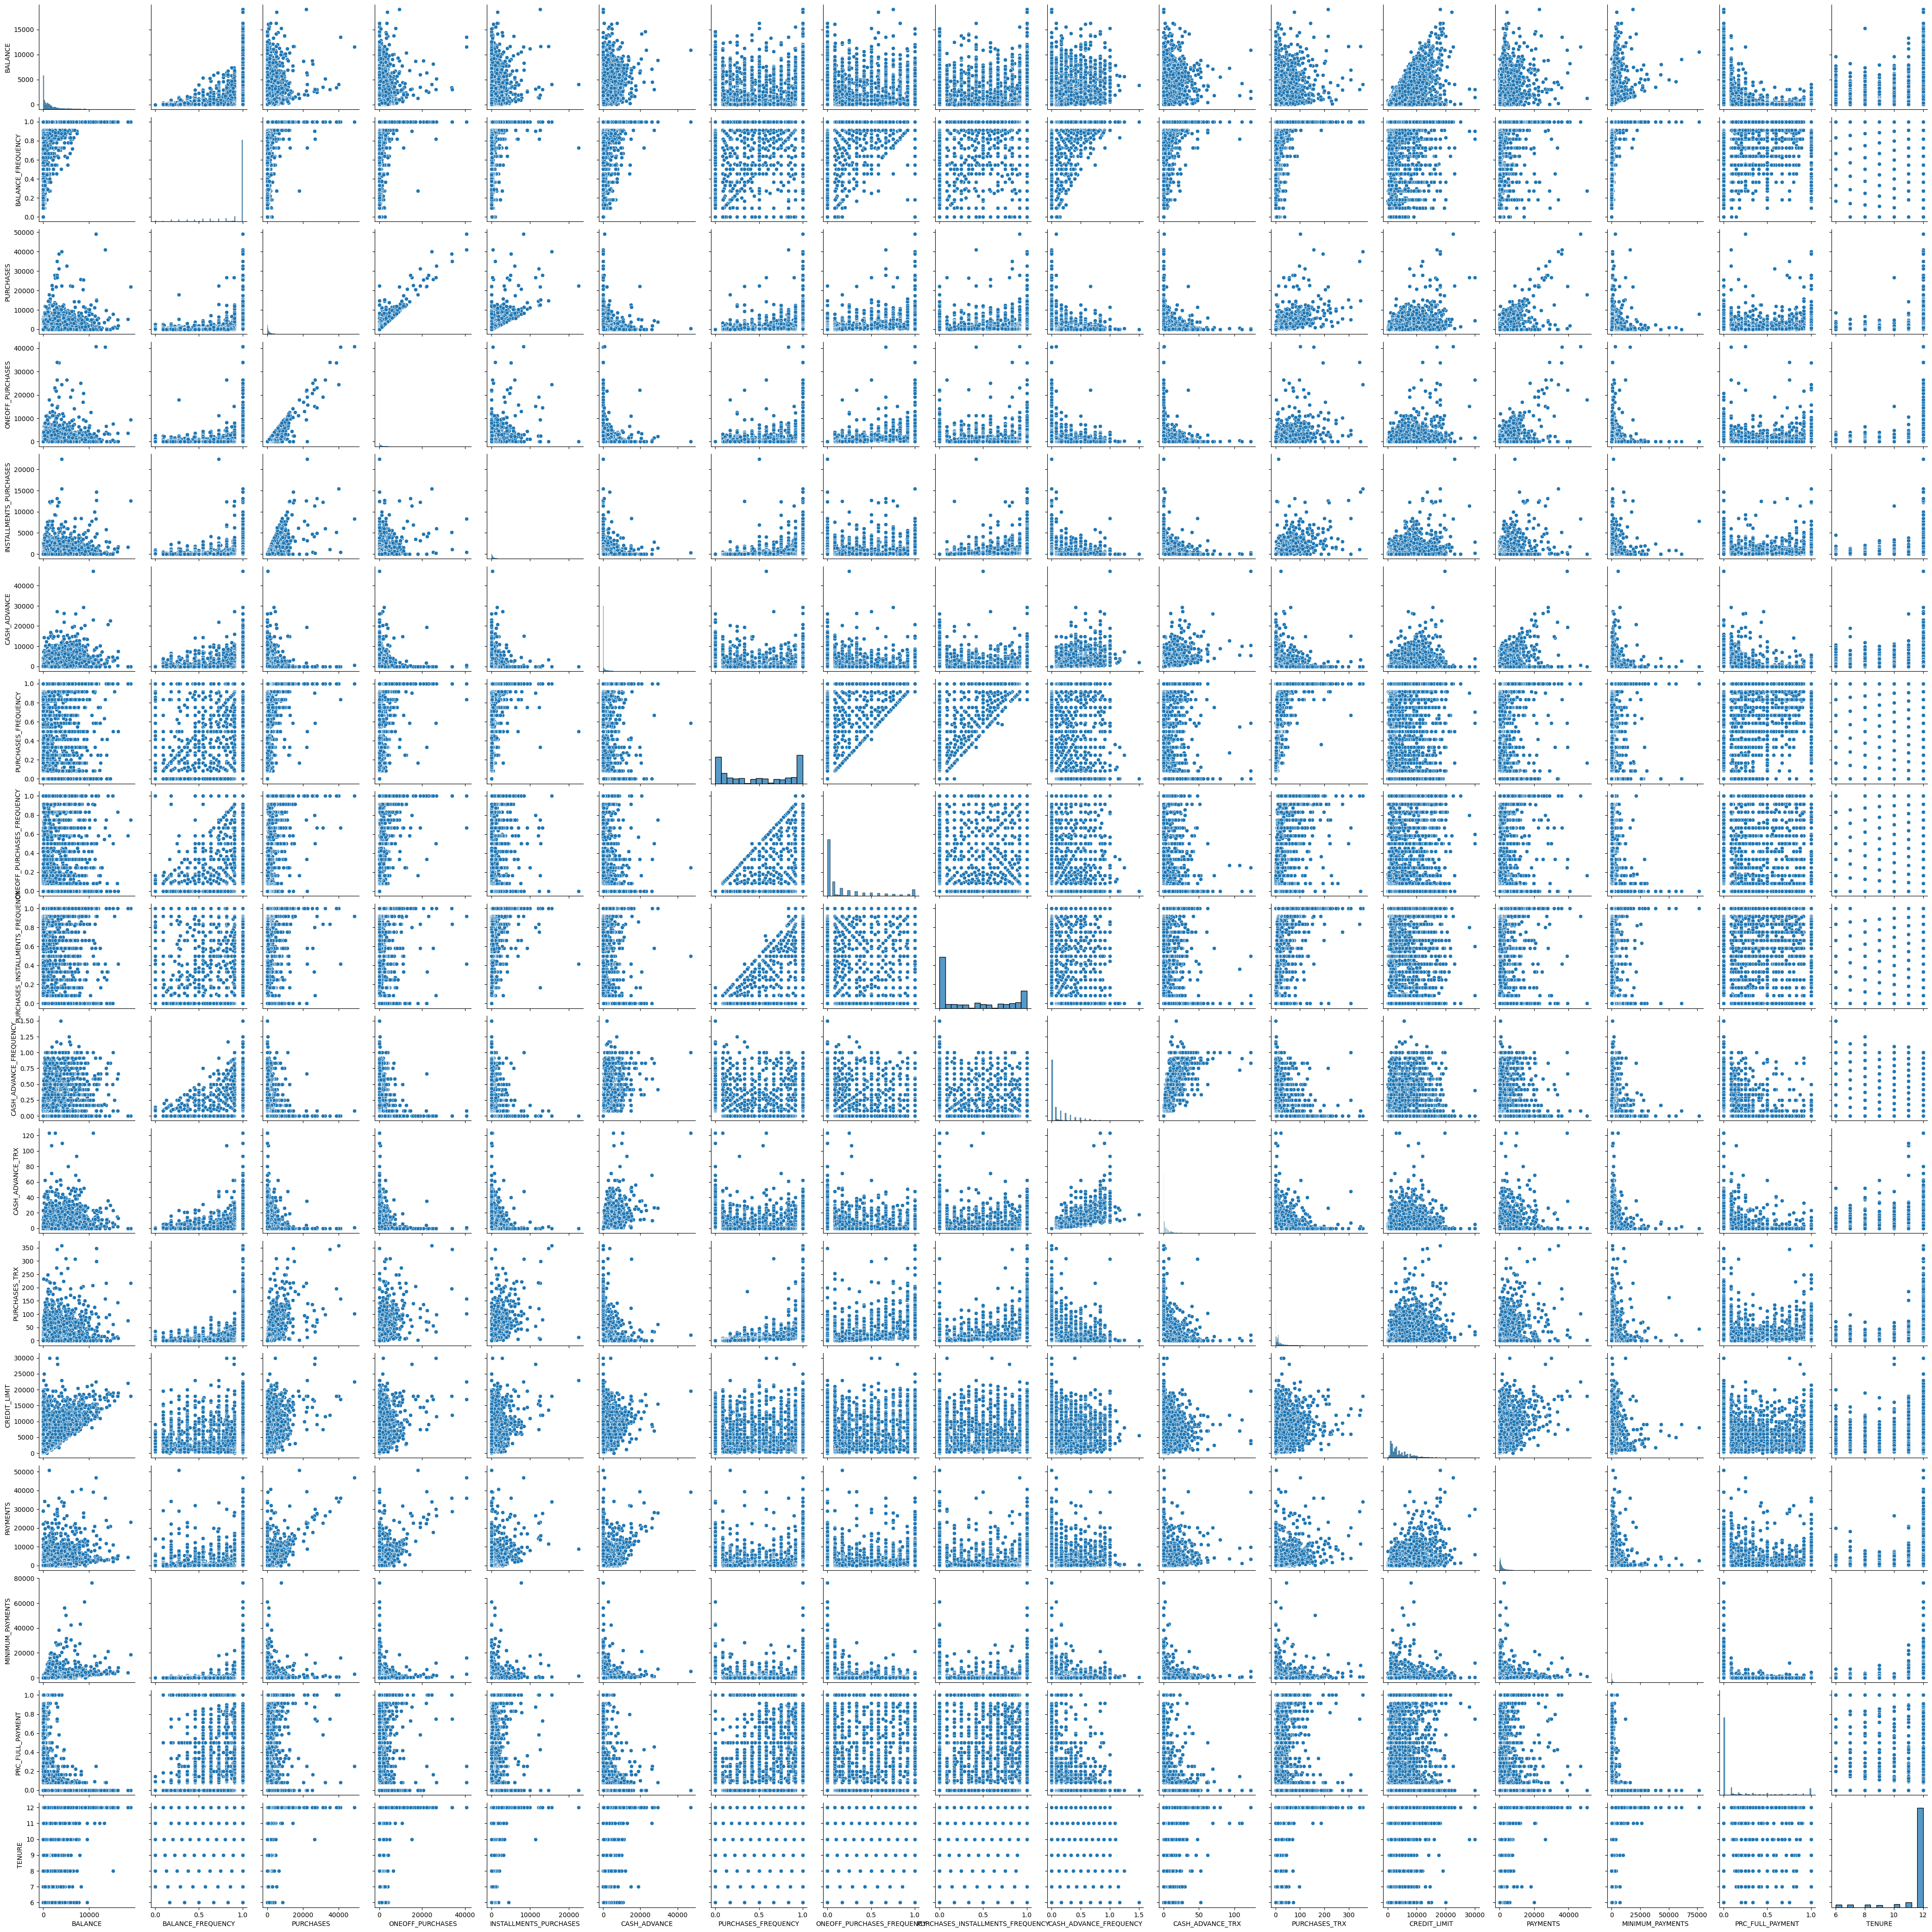

In [34]:
sns.pairplot(dataset)

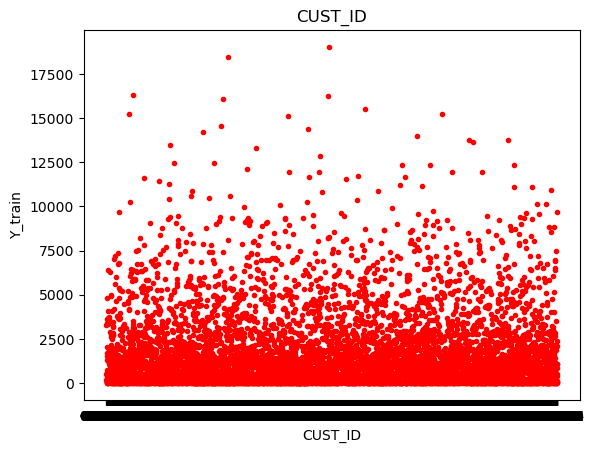

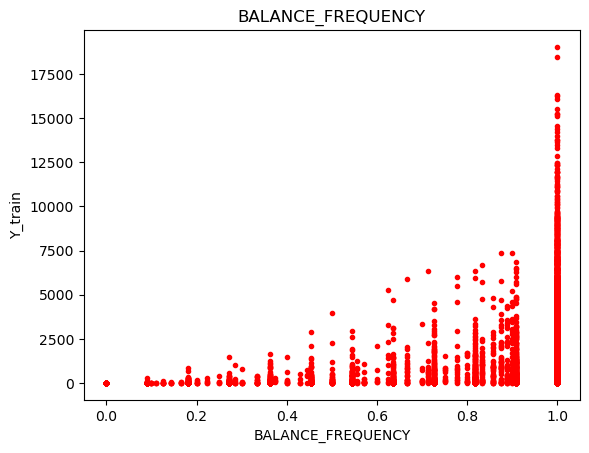

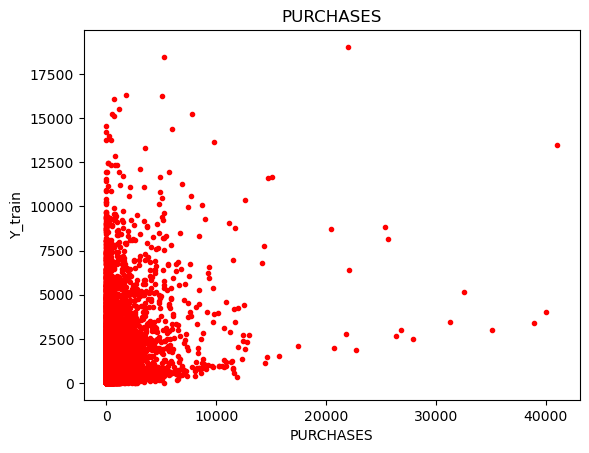

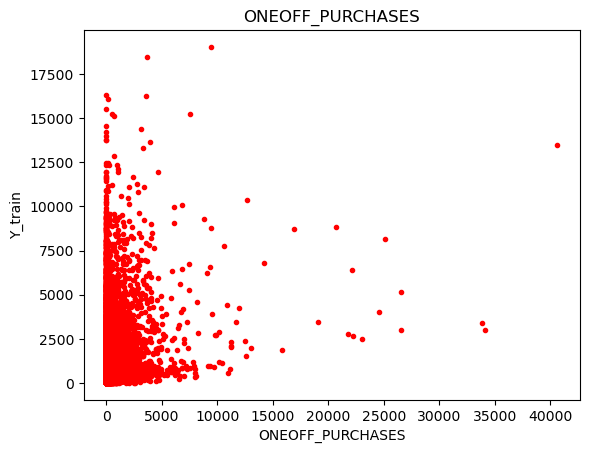

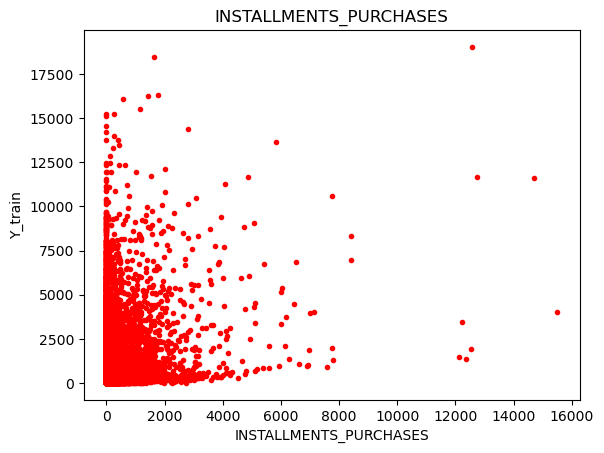

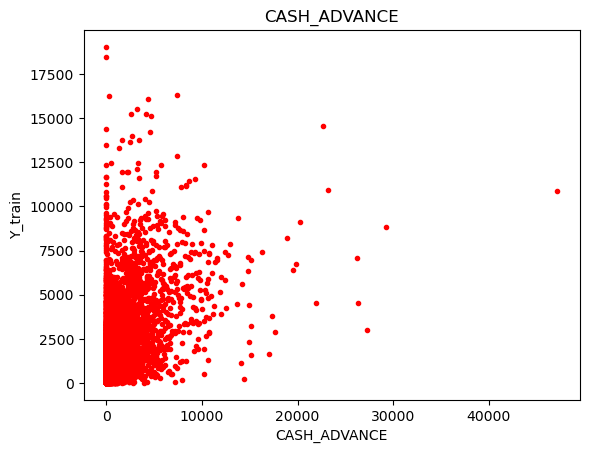

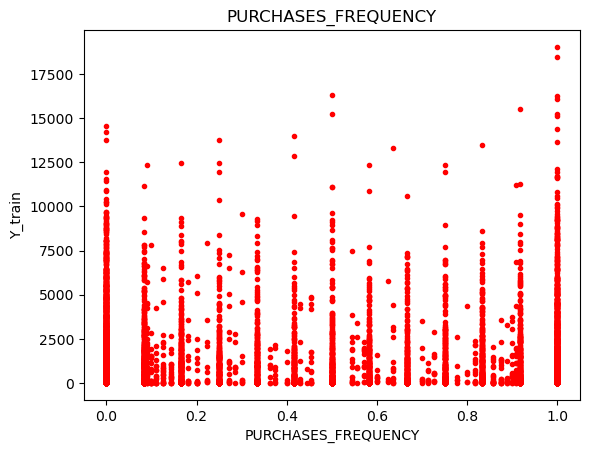

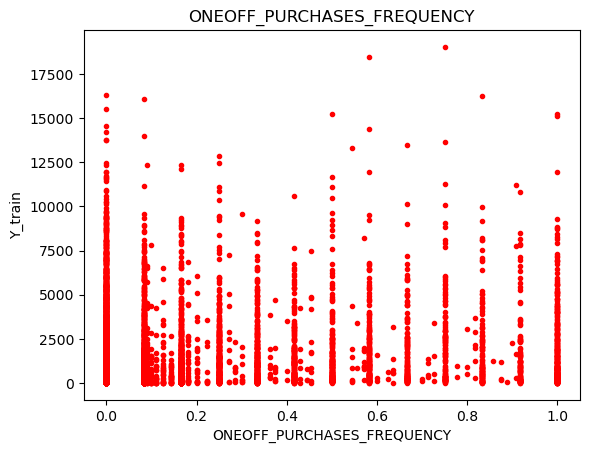

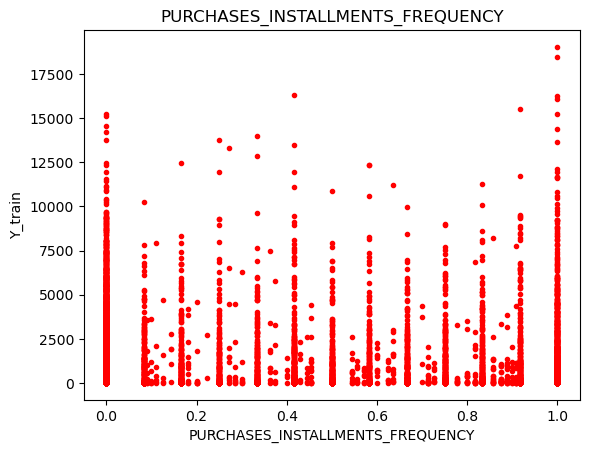

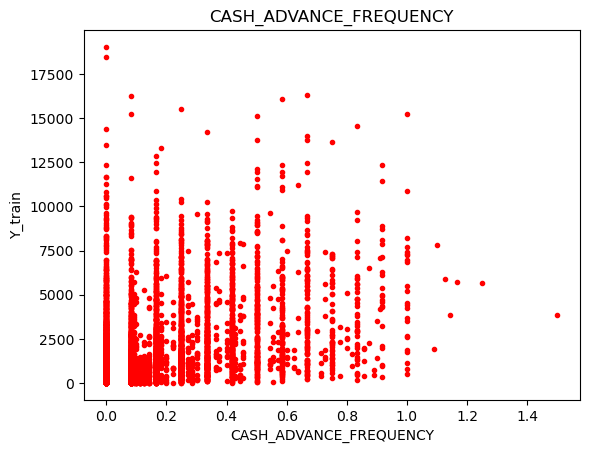

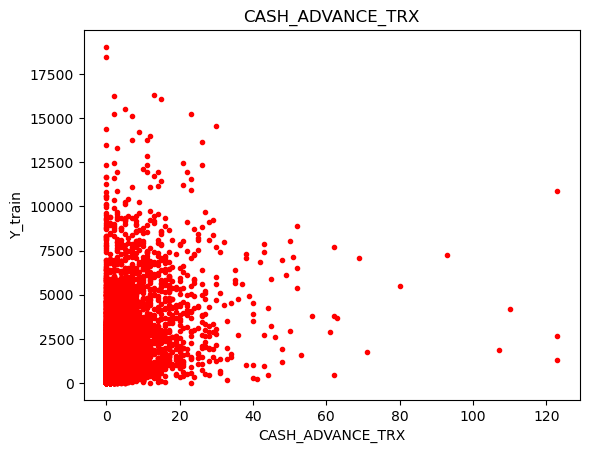

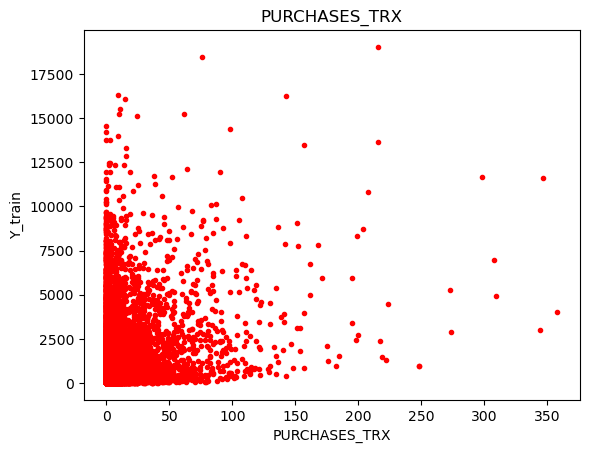

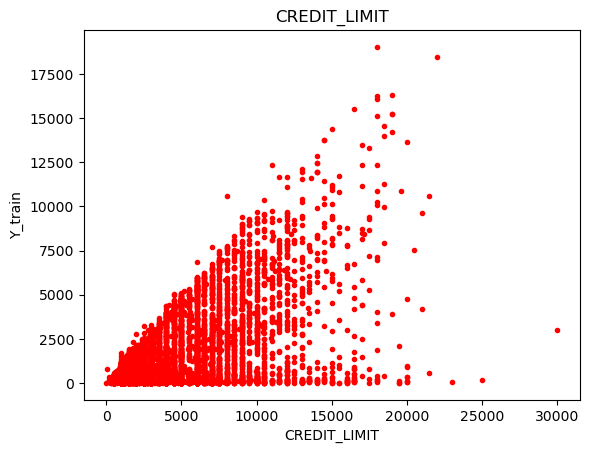

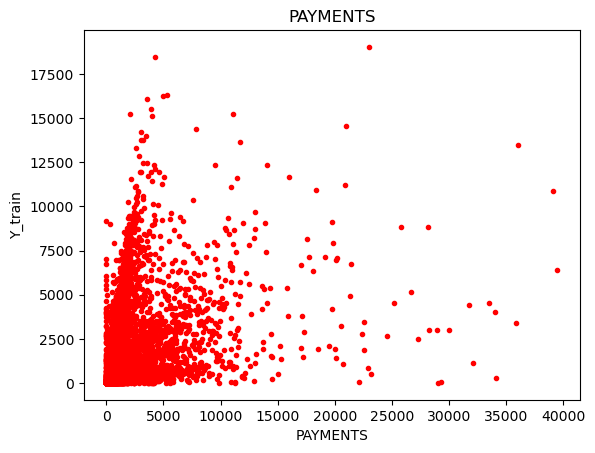

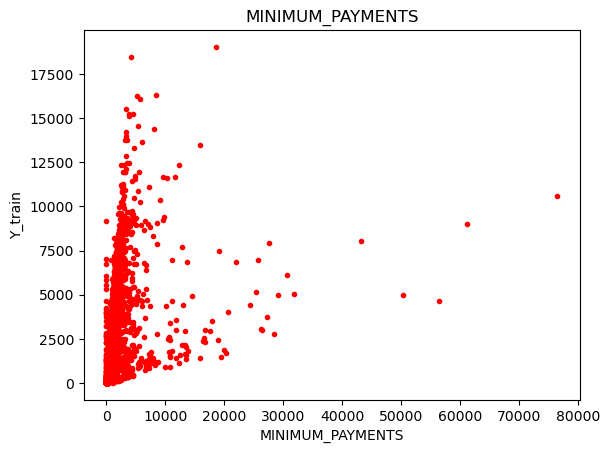

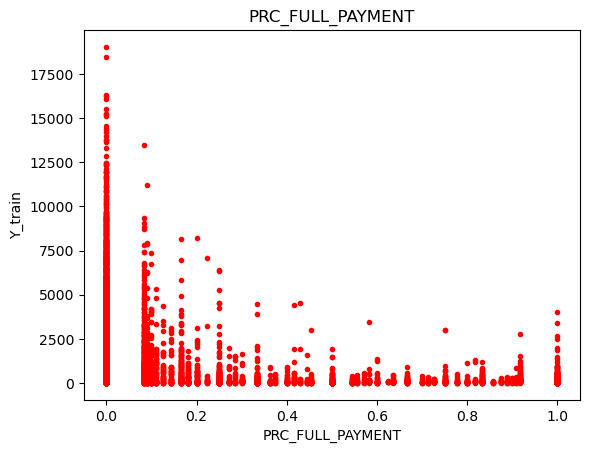

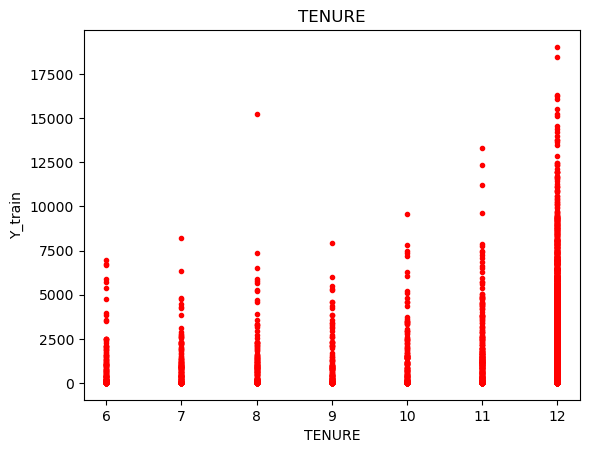

In [35]:
for column in X_train.columns:
    plt.figure()  
    plt.plot(X_train[column], y_train, 'r.')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Y_train')
    plt.show()


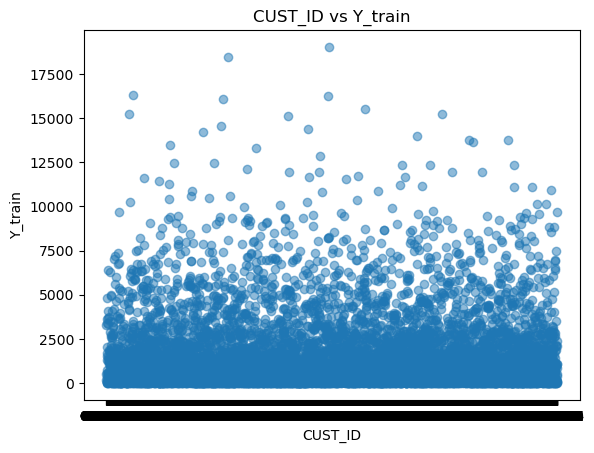

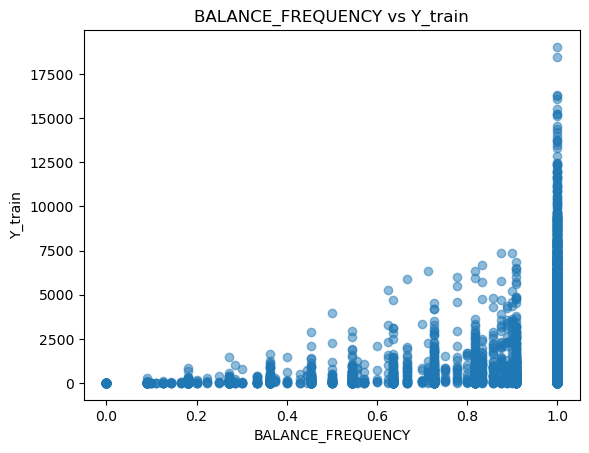

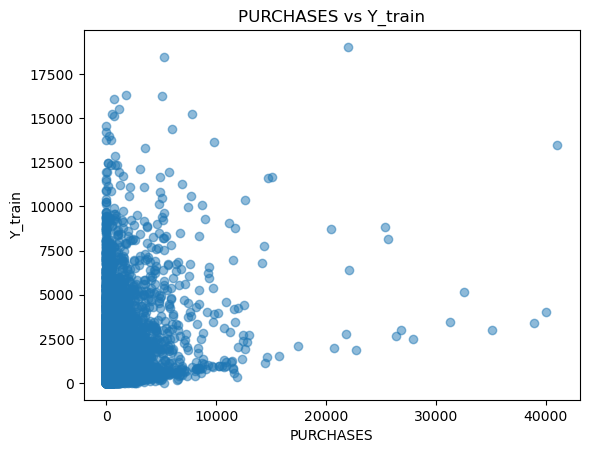

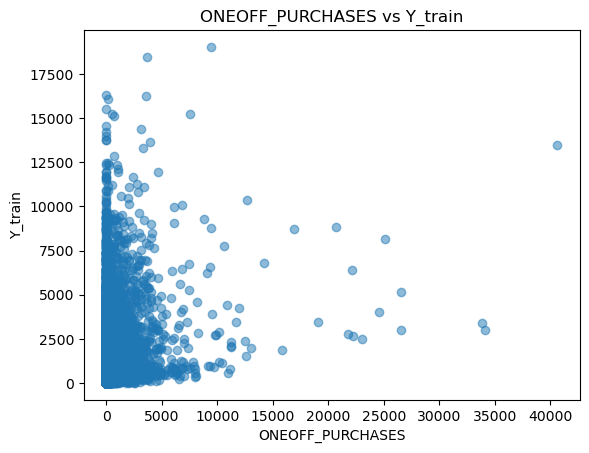

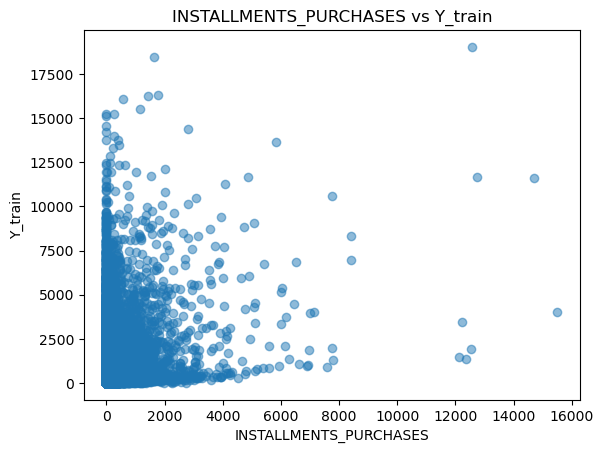

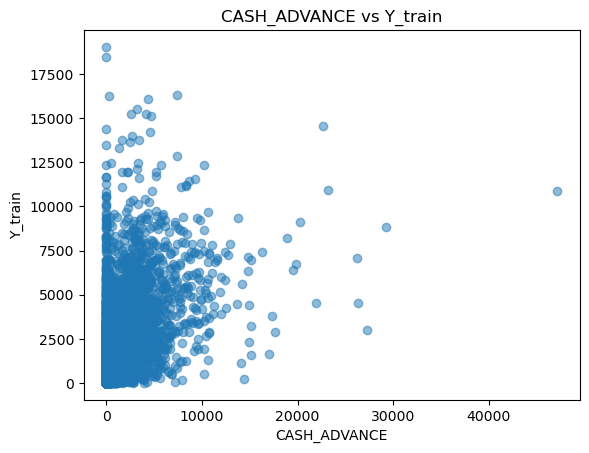

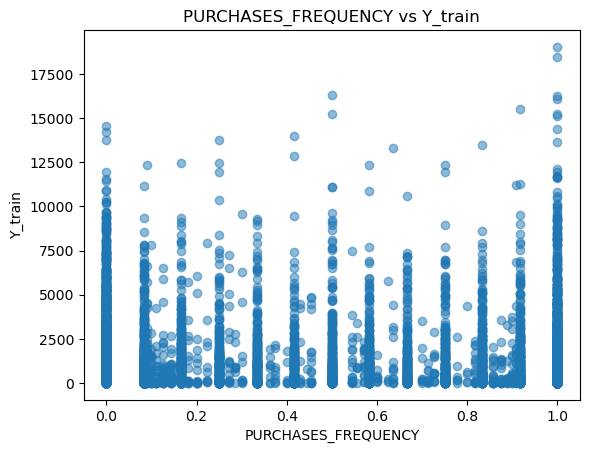

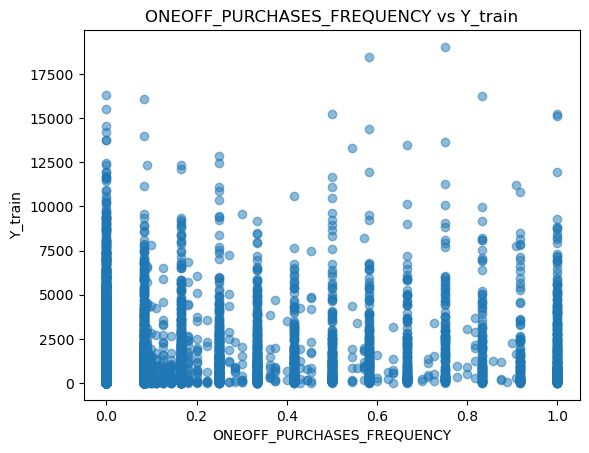

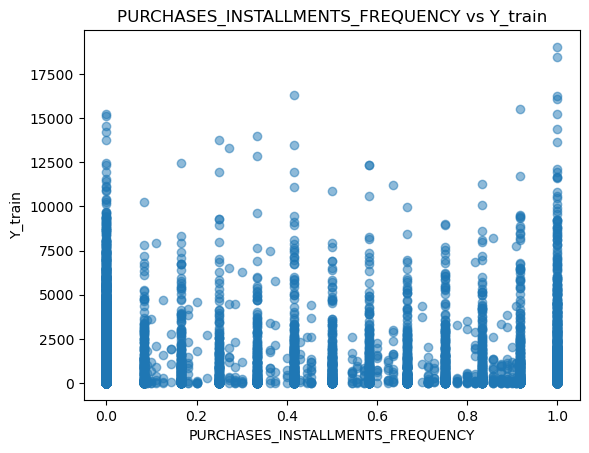

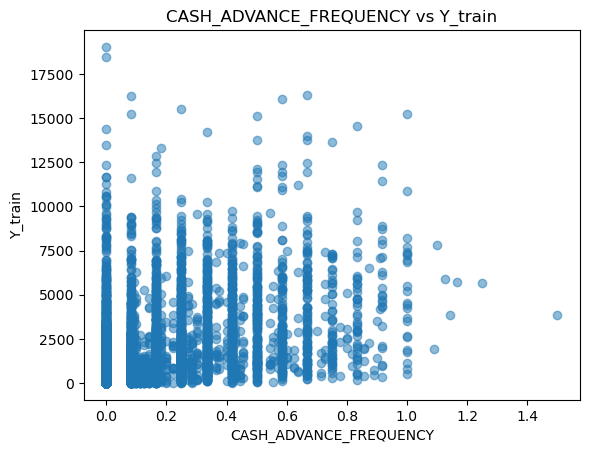

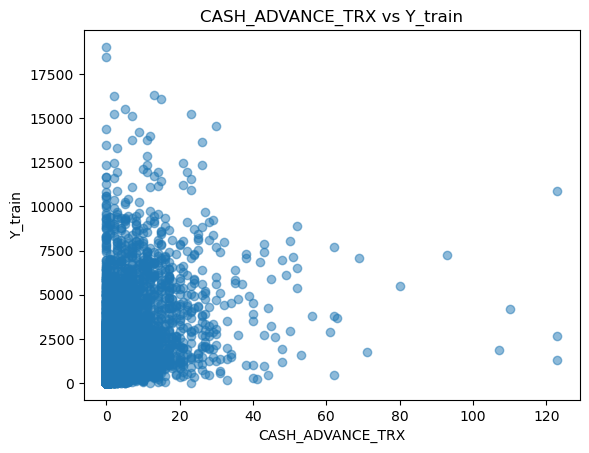

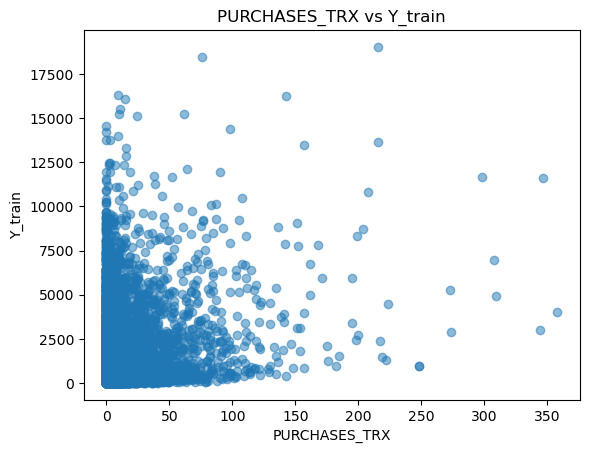

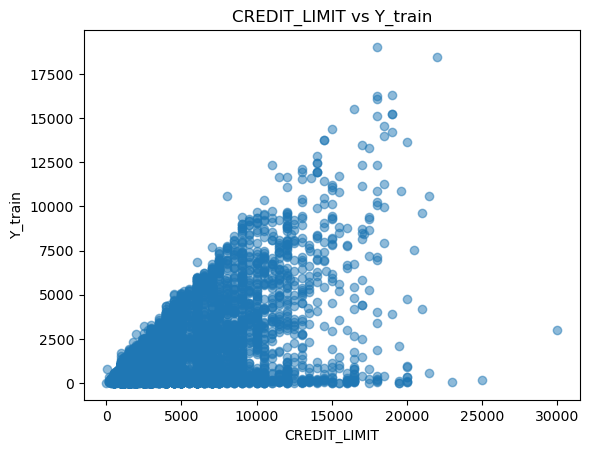

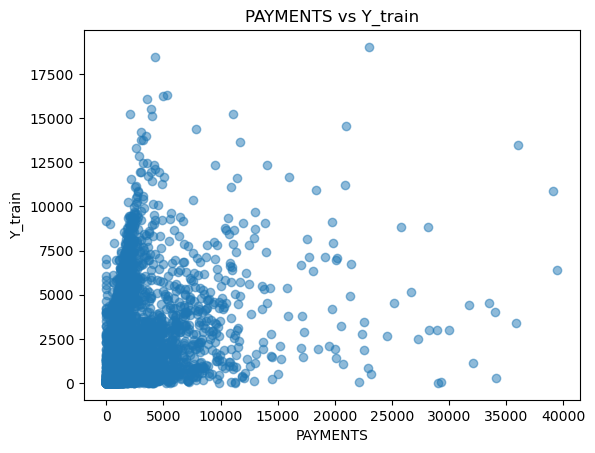

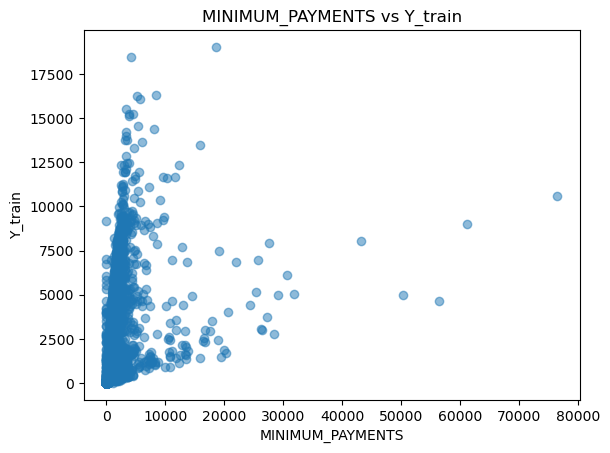

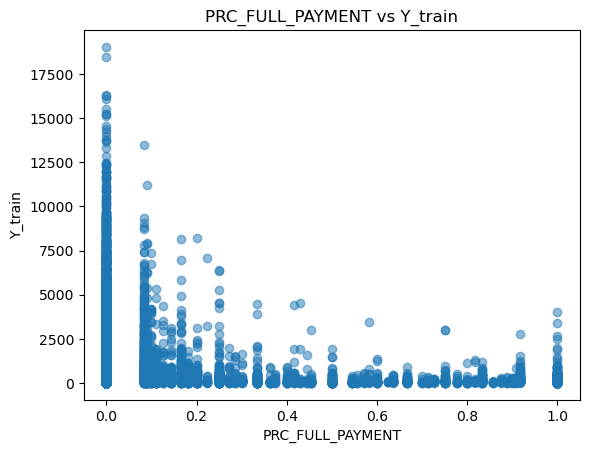

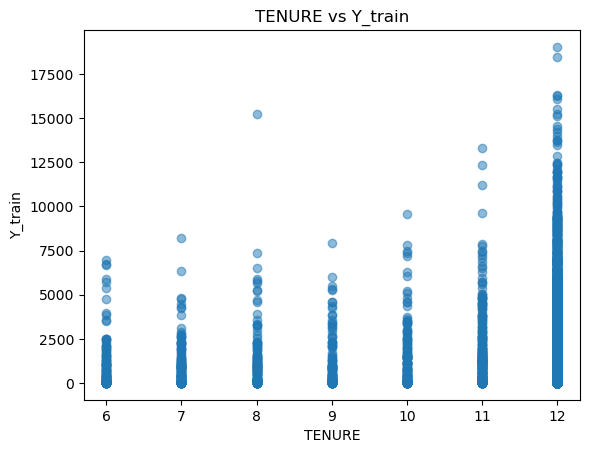

In [36]:
for column in X_train.columns:
    plt.figure()
    plt.scatter(X_train[column], y_train, alpha=0.5)
    plt.title(f"{column} vs Y_train")
    plt.xlabel(column)
    plt.ylabel('Y_train')
    plt.show()

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10)
})
y_train = np.random.rand(10)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
# 1. Adım: Sütunları kontrol et
print("X_train sütunları:", X_train.columns)
print("X_test sütunları:", X_test.columns)

# 2. Adım: Eksik sütunları bul ve işle
missing_columns = set(X_train.columns) - set(X_test.columns)
for col in missing_columns:
    X_test[col] = 0  # ya da uygun bir değer ile doldur

# 3. Adım: Sütunları aynı sırayla düzenle
X_test = X_test[X_train.columns]

# 4. Adım: Tahmin yap
y_pred = regressor.predict(X_test).round(1)



X_train sütunları: Index(['feature1', 'feature2', 'feature3'], dtype='object')
X_test sütunları: Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [39]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test).round(1)


In [40]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'])
hesaplama

INSTALLMENTS_PURCHASES  CASH_ADVANCE
0                  16.834929           0.1
1                 540.020858           0.1
2                 119.237712           0.1
3                 894.081947           0.1
4                1294.145453           0.1
...                      ...           ...
1785             1469.720674           0.1
1786             1641.251218           0.1
1787                5.606423           0.1
1788               16.727286           0.1
1789             4587.062248           0.1

[1790 rows x 2 columns]

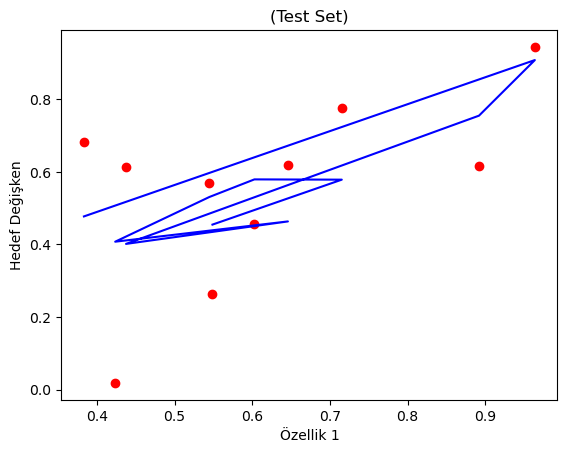

In [41]:
plt.scatter(X_train['feature1'], y_train, color = 'red')


plt.plot(X_train['feature1'], regressor.predict(X_train), color = 'blue')

plt.title('(Test Set)')
plt.xlabel('Özellik 1')
plt.ylabel('Hedef Değişken')
plt.show()


In [42]:
hesaplama

INSTALLMENTS_PURCHASES  CASH_ADVANCE
0                  16.834929           0.1
1                 540.020858           0.1
2                 119.237712           0.1
3                 894.081947           0.1
4                1294.145453           0.1
...                      ...           ...
1785             1469.720674           0.1
1786             1641.251218           0.1
1787                5.606423           0.1
1788               16.727286           0.1
1789             4587.062248           0.1

[1790 rows x 2 columns]

In [43]:
dataset = pd.read_csv(r'C:\Users\suayp\Desktop\kullanilacak_veri\Project_Data.csv')
dataset.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [44]:
if 'CUST_ID' in dataset.columns:
    dataset = dataset.drop(['CUST_ID'], axis=1)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
sns.pairplot(dataset)


In [ ]:
dataset.shape

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)